# **Tarefa 5.5 - CNN no reconhecimento de objetos em imagens** - CIFAR-10 | *Lucas Omar*

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
####################
# Carregando dados #
####################

from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(trainX, trainY), (testX, testY) = cifar10.load_data()
print('Dados de treino: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Dados de teste: X=%s, y=%s' % (testX.shape, testY.shape))

170508288/170498071 [==============================] - 13s 0us/step
Dados de treino: X=(50000, 32, 32, 3), y=(50000, 1)
Dados de teste: X=(10000, 32, 32, 3), y=(10000, 1)


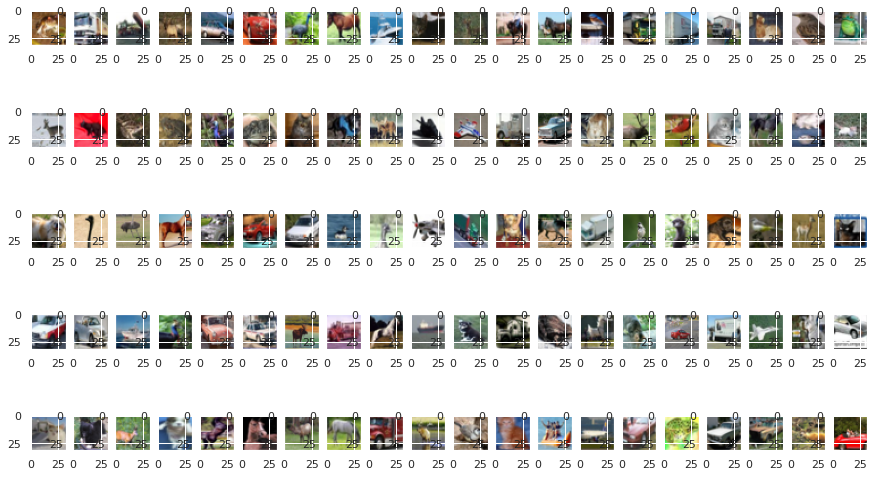

In [12]:
from matplotlib import pyplot

for i in range(100):
	pyplot.subplot(5,20,i+1)
	pyplot.imshow(trainX[i])

pyplot.show()

In [13]:
trainX = trainX.astype('float32') / 255
trainY = to_categorical(trainY)

testX = testX.astype('float32') / 255
testY = to_categorical(testY)

In [8]:
# Importação dos pacotes
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import UpSampling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout

# carrega o modelo base ResNET com pesos Imagenet (que serão ajustados/treinados)
base_model = ResNet50(include_top=False, weights = 'imagenet', input_shape=(256, 256, 3))

# marca as camadas como não treináveis (não terão os pesos ajustados)
for layer in base_model.layers:
	layer.trainable = False

# Monta o modelo completo utilizando o modelo base
model = Sequential()
model.add(UpSampling2D((2,2),input_shape=(32, 32, 3)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(base_model)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

94781440/94765736 [==============================] - 0s 0us/step


In [9]:
####################
# Compila o modelo #
####################
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate=2e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
###################
# Treina o modelo #
###################
history = model.fit(trainX, trainY, epochs=10, batch_size=10, validation_data=(testX, testY))

Epoch 1/10
5000/5000 [==============================] - 325s 64ms/step - loss: 2.3619 - accuracy: 0.2138 - val_loss: 1.6820 - val_accuracy: 0.4069
Epoch 2/10
5000/5000 [==============================] - 357s 71ms/step - loss: 2.1493 - accuracy: 0.2643 - val_loss: 1.5882 - val_accuracy: 0.4501
Epoch 3/10
5000/5000 [==============================] - 360s 72ms/step - loss: 2.0199 - accuracy: 0.3034 - val_loss: 1.5082 - val_accuracy: 0.4771
Epoch 4/10
5000/5000 [==============================] - 360s 72ms/step - loss: 1.9548 - accuracy: 0.3198 - val_loss: 1.4674 - val_accuracy: 0.4946
Epoch 5/10
5000/5000 [==============================] - 359s 72ms/step - loss: 1.8925 - accuracy: 0.3381 - val_loss: 1.4344 - val_accuracy: 0.5066
Epoch 6/10
5000/5000 [==============================] - 322s 64ms/step - loss: 1.8479 - accuracy: 0.3518 - val_loss: 1.4010 - val_accuracy: 0.5153
Epoch 7/10
5000/5000 [==============================] - 322s 64ms/step - loss: 1.7984 - accuracy: 0.3692 - val_loss: 1

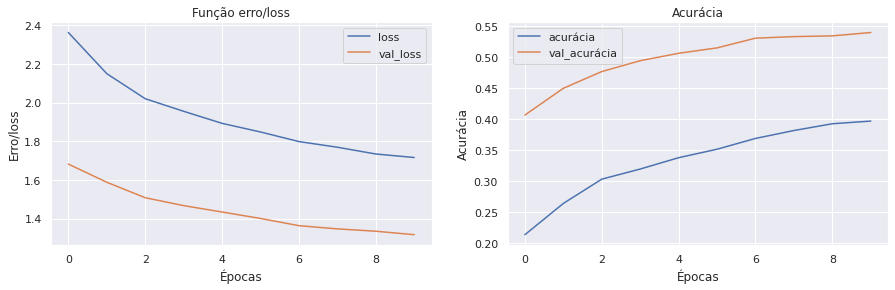

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # GRAPHICS GENERATION

sns.set(rc={'figure.figsize':(15,9)})

#######################################
# Análise da função loss (erro/perda) #
#######################################
plt.subplot(2,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Épocas")
plt.ylabel('Erro/loss')
plt.title('Função erro/loss')
plt.legend(['loss', 'val_loss'])

###############################################
# Análise da métrica de desempenho (acurácia) #
###############################################
plt.subplot(2,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Épocas")
plt.ylabel('Acurácia')
plt.title('Acurácia')
plt.legend(['acurácia', 'val_acurácia'])
plt.show()

In [45]:
from google.colab import files
uploaded = files.upload()

Saving imagem_teste.zip to imagem_teste.zip


In [47]:
!unzip -uq imagem_teste.zip
!ls -l

replace 0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace 2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace 3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
total 1288
-rw-r--r-- 1 root root   7446 Jun 27 23:17  0.jpg
-rw-r--r-- 1 root root   9953 Jun 27 23:16  1.jpg
-rw-r--r-- 1 root root  19927 Jun 27 23:16  2.jpg
-rw-r--r-- 1 root root   5935 Jun 27 23:16  3.jpg
-rw-r--r-- 1 root root 498247 Jun 27 23:07  4.jpg
-rw-r--r-- 1 root root  21639 Jun 27 23:07  5.jpg
-rw-r--r-- 1 root root  43004 Jun 28 02:30  imagem_teste.zip
-rw-r--r-- 1 root root  43004 Jun 28 02:18 'img (1).zip'
-rw-r--r-- 1 root root 649884 Jun 28 02:14  img.zip
drwxr-xr-x 1 root root   4096 Jun 15 13:42  sample_data


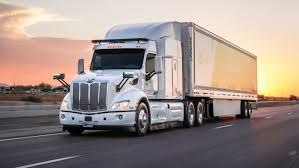

ship 




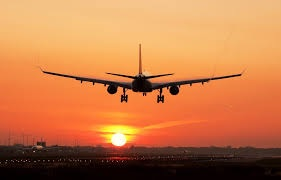

airplane 




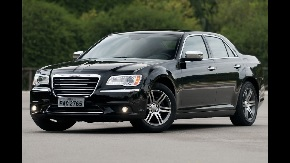

frog 




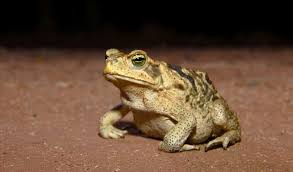

frog 




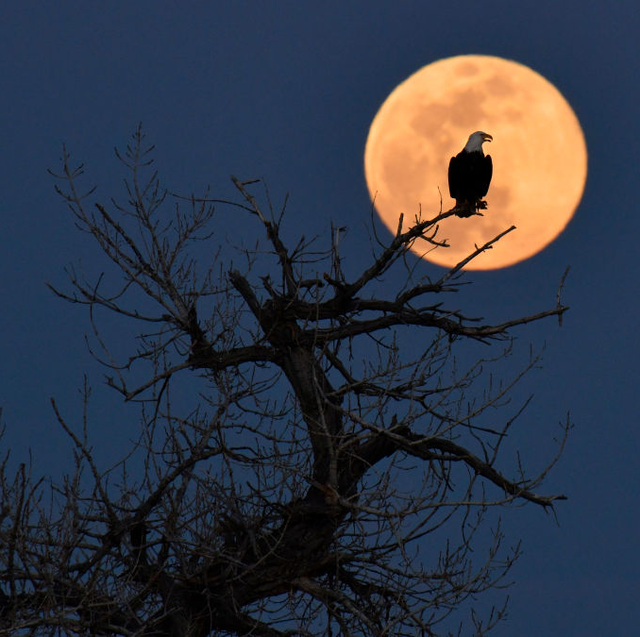

frog 




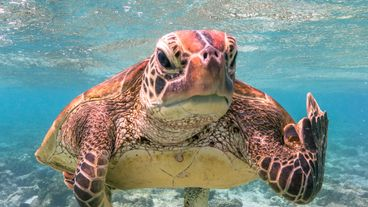

ship 




FileNotFoundError: ignored

In [48]:
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image

Repetir_teste = 'S'
num_img = -1

while num_img < 9:
    num_img = num_img + 1
    file_name = str(num_img)+'.jpg'
    imagem_teste = image.load_img(file_name, target_size = (32, 32))
    imagem_teste = image.img_to_array(imagem_teste)
    imagem_teste = np.expand_dims(imagem_teste, axis = 0)
    # prepara os pixels
    imagem_teste = imagem_teste.astype('float32')
    imagem_teste = imagem_teste/255.0
    predicao = np.argmax(model.predict(imagem_teste),axis=-1)         
    classe = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck', 'tartaruga', 'leão', 'flor', 'paisagem', 'cachorro']
    # exibe a imagem teste             
    display(Image(file_name)) 
    print(classe[int(predicao)],'\n\n')   